In [91]:
import facebook_scraper as fs

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from ast import literal_eval
import json

In [97]:
FANPAGE_PATH = 'insightmatlong' 
PAGE_NUMBER = 10
file_path = "Data\\" + FANPAGE_PATH + '.csv'

In [96]:
# Crawling data
def get_post_data(fanpage_path, page_number):
    fs.set_cookies(cookies='Data\cookies.txt')
    post_list = []

    for post in fs.get_posts(fanpage_path,
                options = {  "comments" : True,"reactions": True, "allow_extra_requests": True ,"reactors" : True},
                extra_info=True, 
                pages=page_number):
        print(post)
        post_list.append(post)

    return post_list

In [20]:
# Pre-Processing and storing data
def convert_to_dataframe(data):
    post_df = pd.DataFrame(columns=data[0].keys(), 
                            index=range(len(data)), 
                            data=data)
    return post_df


def read_data(file_path):
    try:
        missing = [np.nan, 'N/A', 'na', '[]', '[None]']
        data = pd.read_csv(file_path, na_values=missing)
        return data
    except FileNotFoundError:
        print("File not found.")

<span style="color:CYAN;">I. CRAWL DATA</span>


In [ ]:
# Get data
post_data = get_post_data(fanpage_path=FANPAGE_PATH, page_number=10)

post_data_df = convert_to_dataframe(data=post_data)

# Write post data into a csv file for later usage
post_data_df.to_csv(file_path, index=False) 

<span style="color:CYAN;">II. PRE-PROCESSING DATA</span>

In [94]:
df = read_data(file_path)

In [85]:
# Separate each reaction
reactions = []
for i in range(len(df)):
    element = dict(eval(df['reactions'][i]))
    reactions.append(element)

df['like'] = pd.Series(0, index=range(len(df)))
df['love'] = pd.Series(0, index=range(len(df)))
df['haha'] = pd.Series(0, index=range(len(df)))
df['care'] = pd.Series(0, index=range(len(df)))
df['angry'] = pd.Series(0, index=range(len(df)))
df['wow'] = pd.Series(0, index=range(len(df)))
df['sad'] = pd.Series(0, index=range(len(df)))

for idx, reaction_dict in enumerate(reactions):
    for reaction in reaction_dict:
        df[reaction][idx] = reaction_dict[reaction]
    

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_20972\3399568302.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reaction][idx] = reaction_dict[reaction]
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_20972\3399568302.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[reaction][idx] = reaction_dict[reaction]
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_20972\3399568302.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [87]:
# Drop column with more than 60% missing value
large_missing_value_columns = df.loc[:,df.isna().sum(axis=0) > 0.6*len(df)].columns

df.drop(columns=[column for column in large_missing_value_columns], inplace=True)
large_missing_value_columns

Index(['shared_text', 'original_text', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'link', 'factcheck',
       'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username',
       'shared_post_url', 'with', 'sharers', 'start_url'],
      dtype='object')

In [81]:
# Drop irrelevant data
df.columns
df.drop(columns=[''])

Index(['post_id', 'text', 'post_text', 'time', 'timestamp', 'image',
       'image_lowquality', 'images', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'likes', 'comments', 'shares',
       'post_url', 'links', 'user_id', 'username', 'user_url', 'is_live',
       'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions',
       'reaction_count', 'page_id', 'image_id', 'image_ids', 'was_live',
       'fetched_time'],
      dtype='object')

In [86]:
df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,was_live,fetched_time,start_url,like,love,haha,care,angry,wow,sad
0,703546931869779,=))))) quá đáng nó vừa thôi,=))))) quá đáng nó vừa thôi,NaN,NaN,2023-11-29 13:52:10,1701240730,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:02:18.187876,NaN,681,9,1453,3,0,1,86
1,703525678538571,Gắt z =))))),Gắt z =))))),NaN,NaN,2023-11-29 12:48:31,1701236911,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,NaN,...,False,2023-11-29 15:03:06.339731,NaN,4659,85,8621,19,1,15,164
2,703488848542254,Gặp cảnh nghèo mới biết đâu là bạn. Mãi keooo\...,Gặp cảnh nghèo mới biết đâu là bạn. Mãi keooo\...,NaN,NaN,2023-11-29 11:00:06,1701230406,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-29 15:03:35.636156,NaN,3186,195,197,0,0,0,0
3,703462215211584,Đang làm khoá luận thì bị giục cưới:,Đang làm khoá luận thì bị giục cưới:,NaN,NaN,2023-11-29 09:50:39,1701226239,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:03:42.288928,NaN,1721,20,3799,8,0,1,146
4,703234261901046,⚠️SPOILED: TẾT Ở LÀNG Đ.N. TẬP CUỐI\n.\n.\n.\n...,⚠️SPOILED: TẾT Ở LÀNG Đ.N. TẬP CUỐI\n.\n.\n.\n...,NaN,NaN,2023-11-28 22:30:37,1701185437,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,False,2023-11-29 15:04:09.669443,NaN,4399,16,614,1,9,68,1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,697270702497402,"*Nhét vía lại trả, khỏi nhả nghe bây* 😒","*Nhét vía lại trả, khỏi nhả nghe bây* 😒",NaN,NaN,2023-11-17 10:53:54,1700193234,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:32:46.589280,NaN,4431,24,5850,9,6,7,1471
96,697034209187718,"Cuối cùng sau 15 năm, hôm nay Jack và Cody đã ...","Cuối cùng sau 15 năm, hôm nay Jack và Cody đã ...",NaN,NaN,2023-11-16 23:10:17,1700151017,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:33:25.855459,NaN,8609,156,13299,42,0,33,214
97,696834429207696,"🏎 Biến nơi làm việc thành trường đua, tại sao ...","🏎 Biến nơi làm việc thành trường đua, tại sao ...",NaN,NaN,2023-11-16 21:00:11,1700143211,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:33:52.365205,NaN,2779,3,2,0,0,1,0
98,696933902531082,"Giờ chỉ muốn hỏi tí là 8 mùa lá rụng rồi, bà c...","Giờ chỉ muốn hỏi tí là 8 mùa lá rụng rồi, bà c...",NaN,NaN,2023-11-16 20:30:41,1700141441,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,False,2023-11-29 15:33:57.083885,NaN,4099,37,18,5,0,1,0


<span style="color:CYAN;">III. VISUALIZING DATA</span>

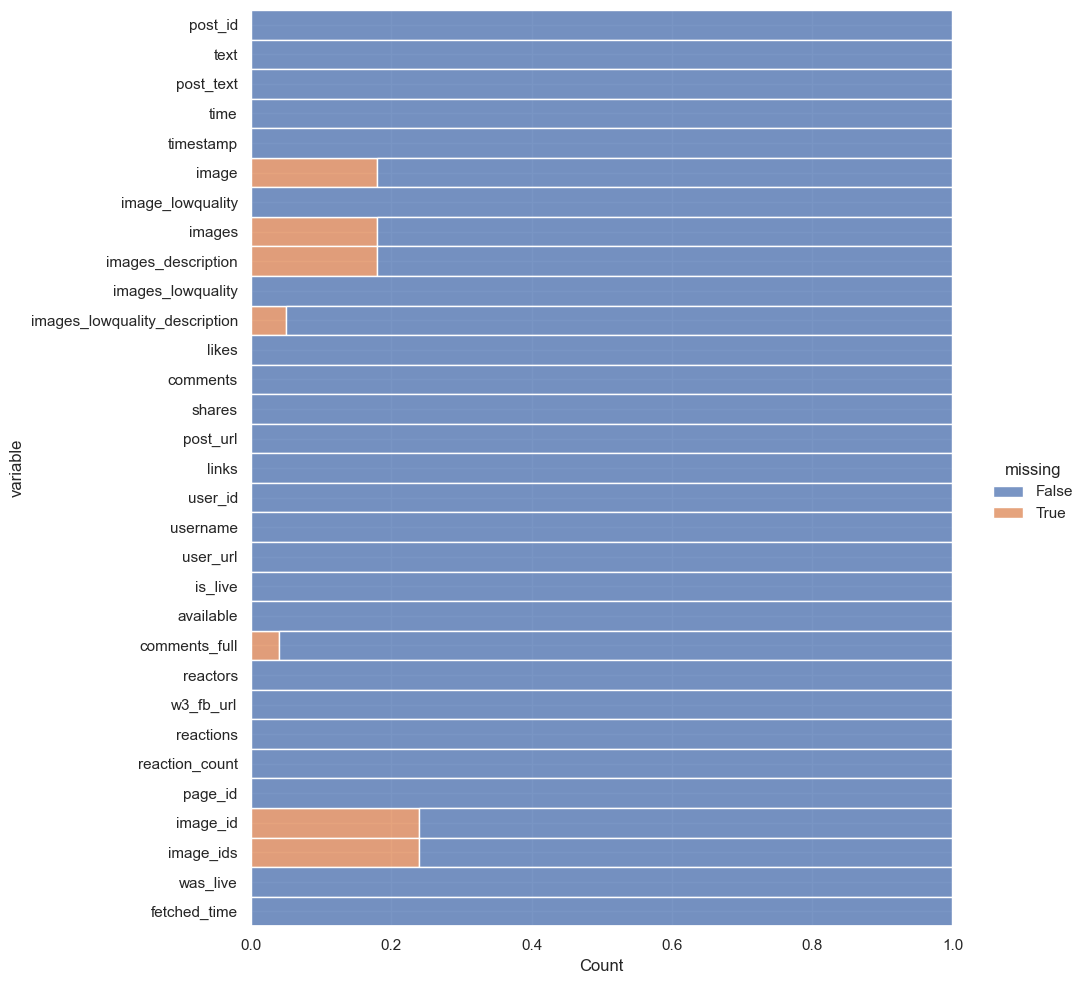

In [78]:
# Data completeness 
sns.displot(
    data=df.isna().melt(value_name="missing"),
    height=10,
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1
)

<Axes: xlabel='hour'>

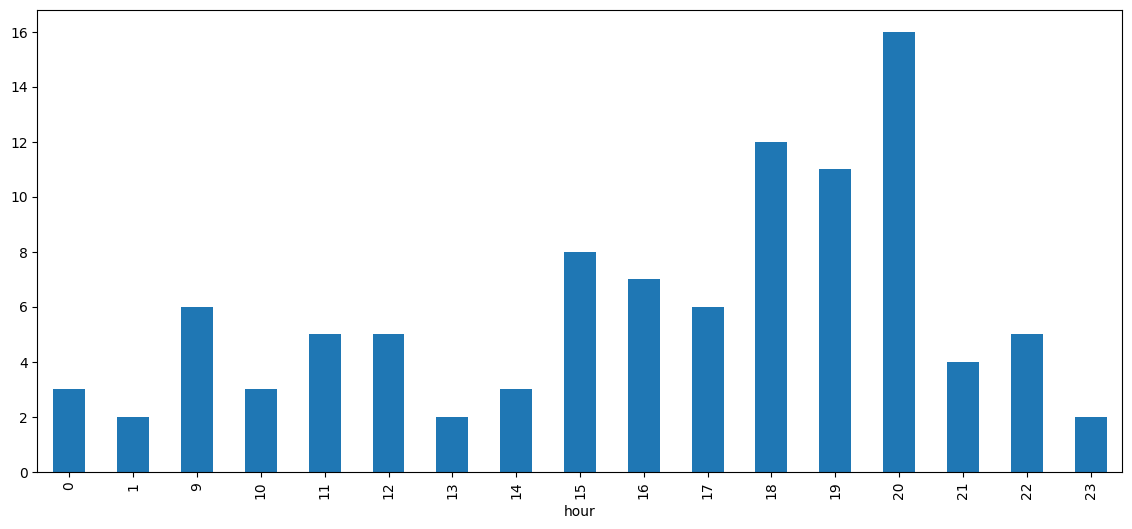

In [33]:
# Quantity of post in relation to time
import datetime

datetime_obj = df['time'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
hour_series = datetime_obj.apply(lambda x : x.hour)
df['hour'] = hour_series
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))


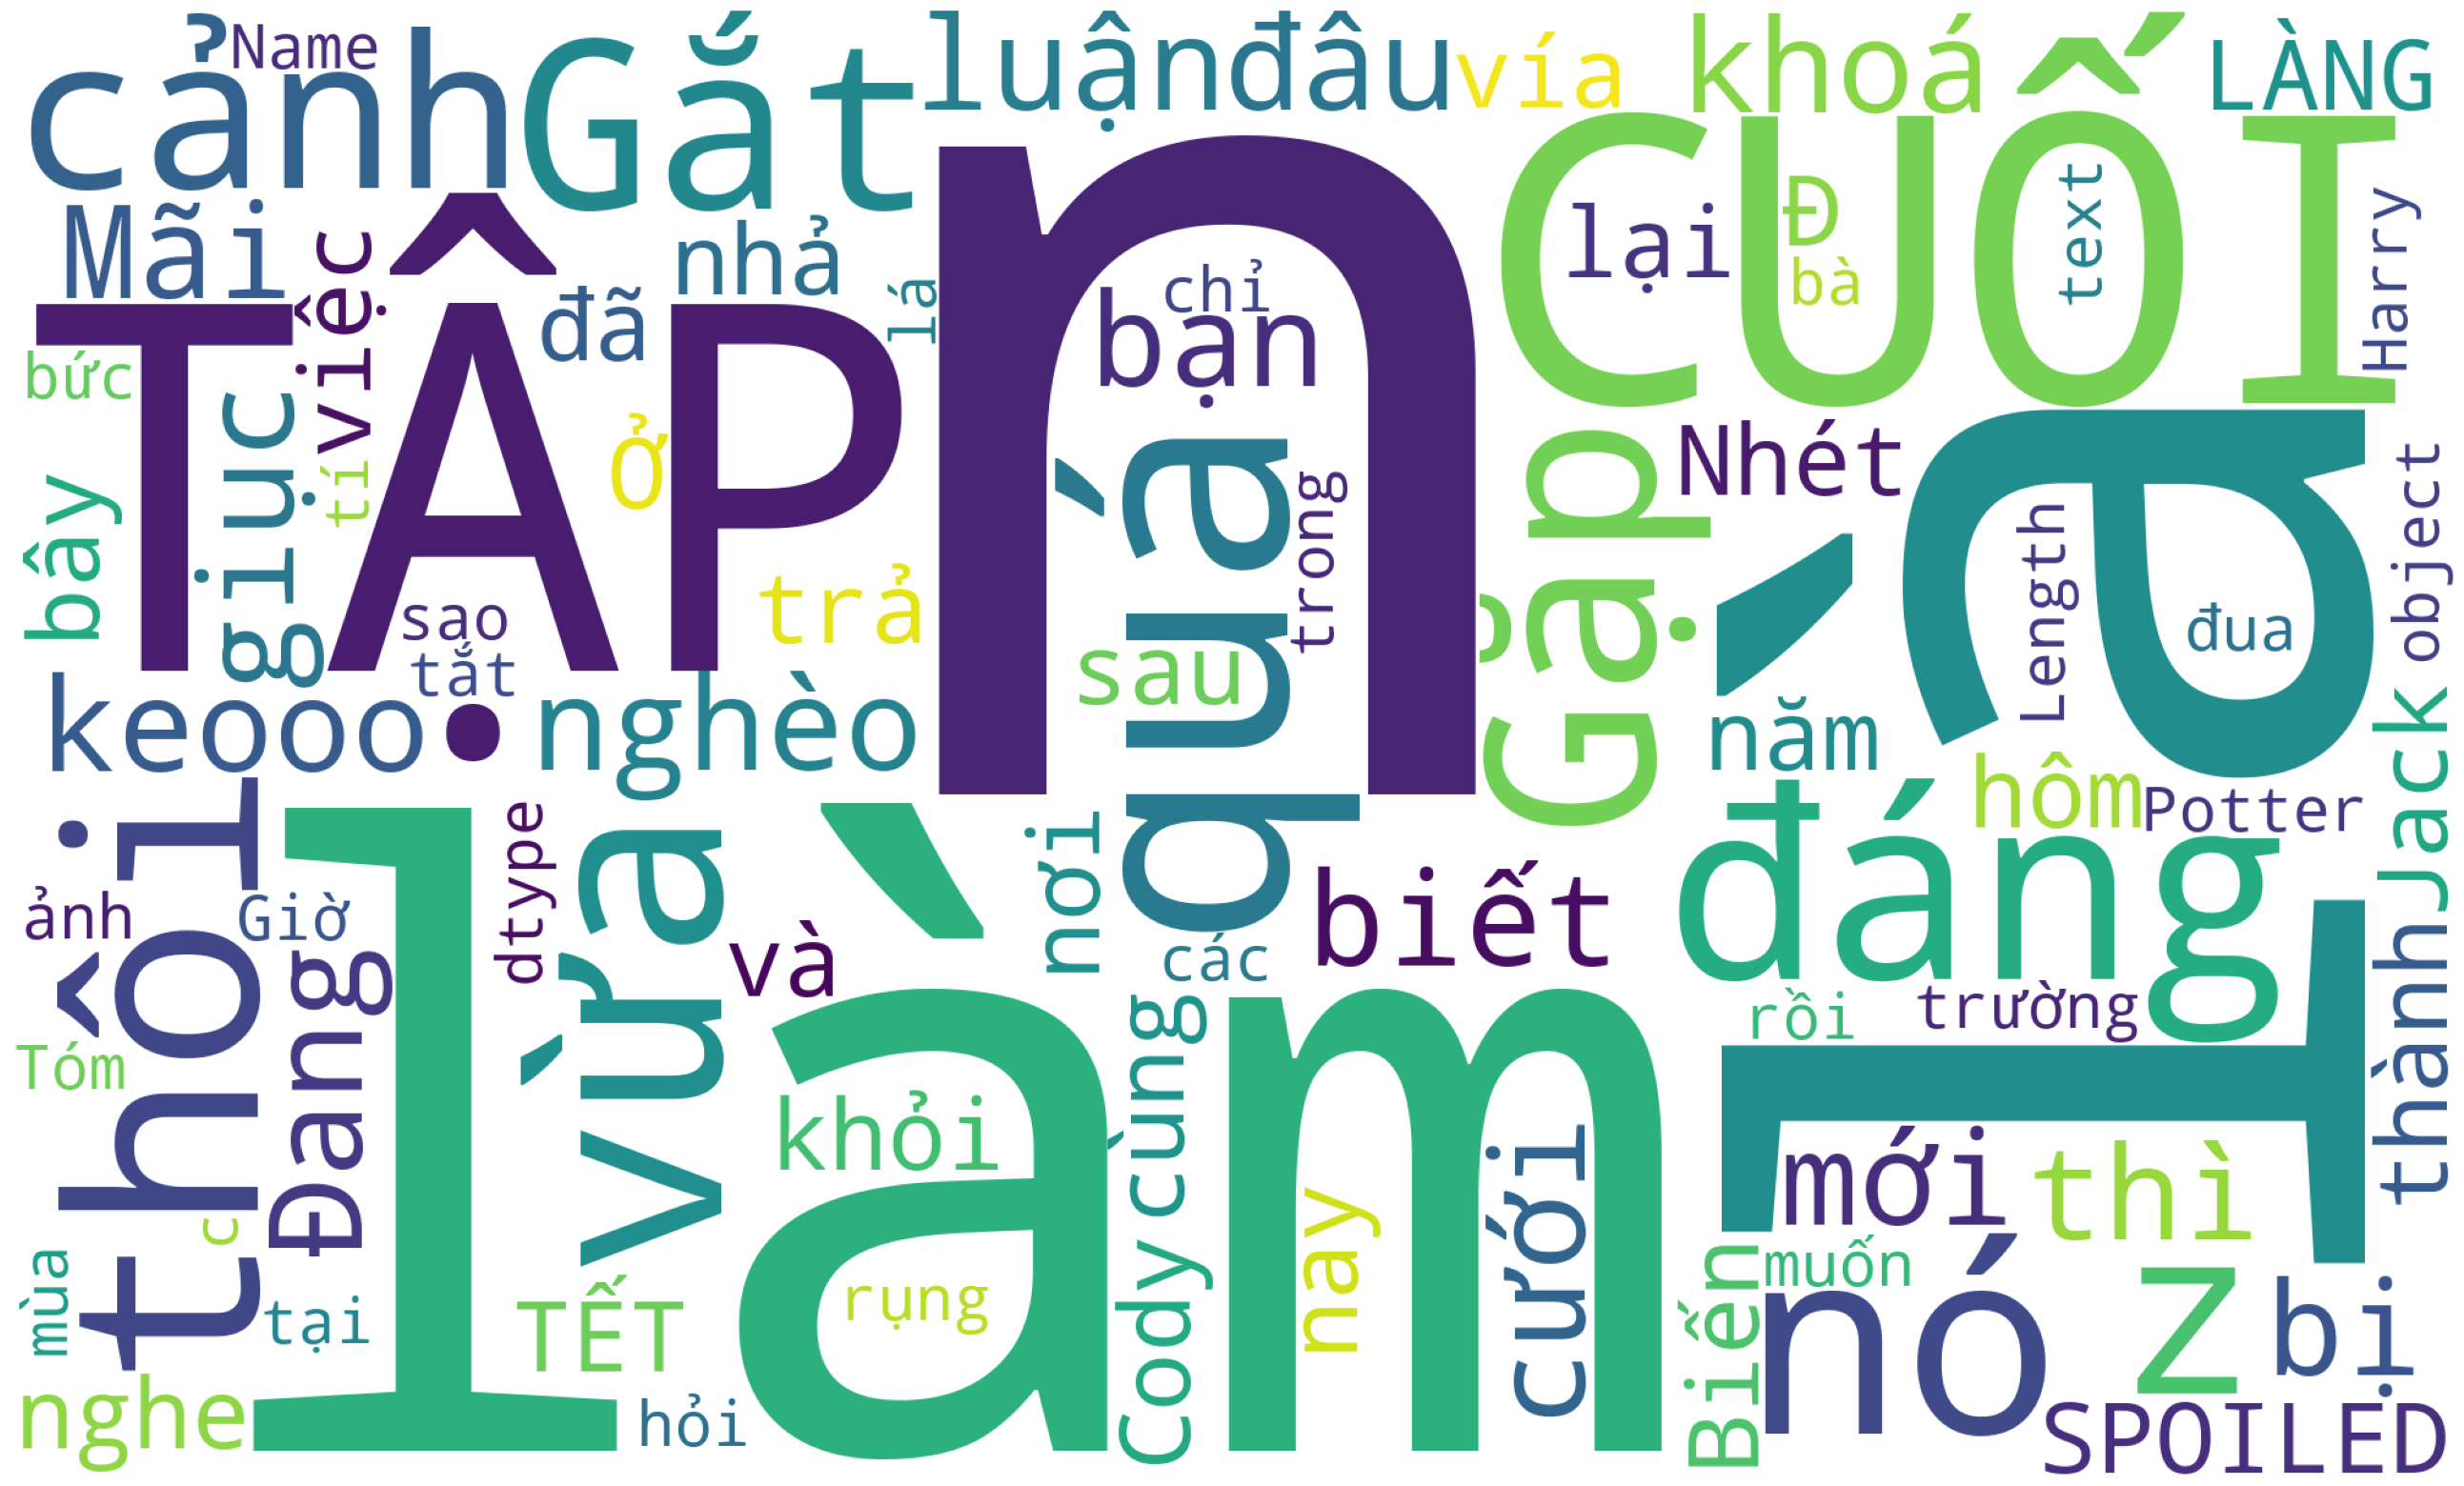

In [34]:
# Stop words
from wordcloud import WordCloud, STOPWORDS

text = str(df['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white', 
                    max_words=500,
                    width=2000, height=1200
                        ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
X = np.array(df[['reaction_count', 'comments']])
Y = np.array(df[['hour']])
print(X.shape, Y.shape)   

(100, 2) (100, 1)


In [21]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)   


(100000, 2) (100000, 1)


In [37]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name='layer1'),
        Dense(1, activation='sigmoid', name='layer2')
    ]
)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print(f"W1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"W2{w2.shape}:\n", w2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.18544692 -0.9989357  -0.19282562]
 [ 0.8229083  -0.12550294 -0.17543507]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.41760194]
 [ 0.7055626 ]
 [-0.09311414]] 
b2(1,): [0.]


In [40]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt, Yt,
    epochs=10,
)

Epoch 1/10
3125/3125 [==============================] - 3s 833us/step - loss: -1033.1211
Epoch 2/10
3125/3125 [==============================] - 3s 818us/step - loss: -2993.8557
Epoch 3/10
3125/3125 [==============================] - 3s 816us/step - loss: -4937.7295
Epoch 4/10
3125/3125 [==============================] - 3s 823us/step - loss: -6881.5381
Epoch 5/10
3125/3125 [==============================] - 3s 809us/step - loss: -8824.7051
Epoch 6/10
3125/3125 [==============================] - 3s 847us/step - loss: -10769.2803
Epoch 7/10
3125/3125 [==============================] - 3s 821us/step - loss: -12712.6553
Epoch 8/10
3125/3125 [==============================] - 2s 796us/step - loss: -14655.9717
Epoch 9/10
3125/3125 [==============================] - 2s 792us/step - loss: -16600.3828
Epoch 10/10
3125/3125 [==============================] - 3s 839us/step - loss: -18544.2500


In [41]:
X_test = np.array([
    [122,12],  # postive example
    [10,0]    # negative example
    ])   
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 42ms/step
predictions = 
 [[1.]
 [1.]]


In [42]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [1.]]
